In [1]:
import numpy as np
import os
import h5py as h5
import glob
import matplotlib.pyplot as plt

In [12]:
files = glob.glob("./ConvergenceTest/collapse_cos/*.h5")

In [13]:
file = h5.File(files[0],"r")
keys = list(file["History"].keys())
file.close()

In [14]:
loss = {}
for k in keys:
    loss[k] = np.concatenate(list(map(lambda x: np.array(h5.File(x,"r")["History"][k])[...,None], files)),-1)
    loss[k] = np.reshape(loss[k],(loss[k].shape[0],-1))

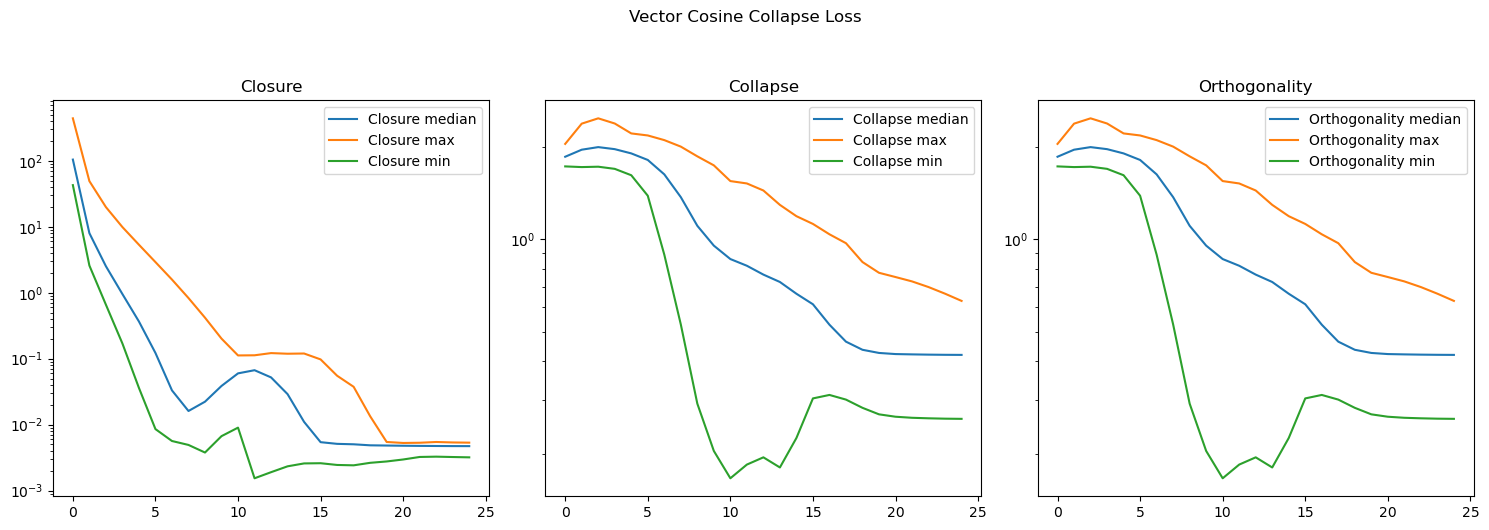

In [15]:
fig, axes = plt.subplots(1, len(keys), figsize=(15, 5))

for i, k in enumerate(keys):
    ax = axes[i]
    x = np.arange(0, loss[k].shape[0], 1)
    # y = loss[k].mean(-1)
    ax.plot(x, np.median(loss[k],-1), label=f"{k} median")
    ax.plot(x, loss[k].max(-1), label=f"{k} max")
    ax.plot(x, loss[k].min(-1), label=f"{k} min")
    ax.set_yscale("log")
    ax.set_title(k)
    ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Vector Cosine Collapse Loss", y=1.05)  # adjust y for spacing
fig.tight_layout()
plt.show()
